In [1]:
#standard libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

#toroidal filament functions
from process_probe_data import retreive_plasma_current, retreive_magnetic_signal,trim_quantities
from toroidalFilament_dir.plasma_shift import toroidal_filament_shift_progression

#OFIT
from OFIT_dir.OFIT import OFIT
from OFIT_dir.local_image import rev_image, get_frames_for_shot

shot_no = 966

# Toroidal Filament Model

## Retreive plasma current and probes' magnetic signals

In [67]:
#retreive processed data
recorded_plasma_current, recorded_time, discharge_begin, discharge_end = retreive_plasma_current(shot_no)
recorded_magnetic_signal = retreive_magnetic_signal(shot_no)

time, plasma_current, plasma_signal = trim_quantities(recorded_time,recorded_magnetic_signal,recorded_plasma_current,discharge_begin,discharge_begin+40)

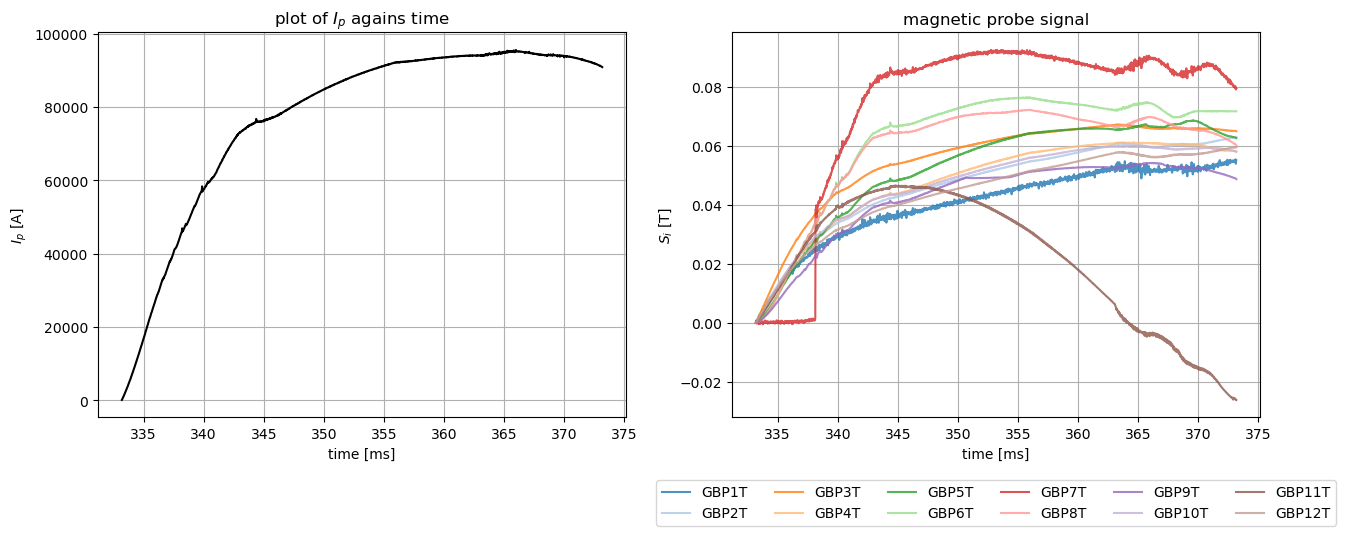

In [68]:
column_names = plasma_signal.columns[1:]


fig, (ax0,ax2) = plt.subplots(1,2, figsize = (15,5))
ax0.plot(time, plasma_current,color = "black")
ax0.set_xlabel("time [ms]")
ax0.set_ylabel("$I_p$ [A]")
ax0.grid()
ax0.set_title("plot of $I_p$ agains time")

cmap = plt.get_cmap("tab20")  # A colormap with 10 distinct colors

for i, name in enumerate(column_names):
    ax2.plot(time, plasma_signal[name], label=name, color=cmap(i),alpha = 0.8)
ax2.set_xlabel("time [ms]")
ax2.set_ylabel("$S_i$ [T]")
ax2.grid()
ax2.set_title("magnetic probe signal")
ax2.legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3), ncol = 6)
plt.show()

## Calculate plasma shift

In [58]:
use_probes = [[1,4,7,10],[12,3,6,9],[2,5,8,11],[12,2,6,8]]
valid_time, R0_arr, R0_err, Z0_arr, Z0_err = toroidal_filament_shift_progression(time,plasma_signal,use_probes)

100%|█████████▉| 5298/5308 [06:17<00:00, 15.00it/s]

horizontal shift at time 439.102436 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.142434 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.142434 is beyond domain for probe [12, 2, 6, 8] use a_f = R0
horizontal shift at time 439.162434 is beyond domain for probe [1, 4, 7, 10] use a_f = R0
horizontal shift at time 439.162434 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.162434 is beyond domain for probe [12, 2, 6, 8] use a_f = R0


100%|█████████▉| 5304/5308 [06:17<00:00, 14.67it/s]

horizontal shift at time 439.182433 is beyond domain for probe [12, 2, 6, 8] use a_f = R0
horizontal shift at time 439.202432 is beyond domain for probe [1, 4, 7, 10] use a_f = R0
horizontal shift at time 439.202432 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.222431 is beyond domain for probe [12, 2, 6, 8] use a_f = R0
horizontal shift at time 439.24243 is beyond domain for probe [1, 4, 7, 10] use a_f = R0
horizontal shift at time 439.24243 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.24243 is beyond domain for probe [12, 2, 6, 8] use a_f = R0


100%|█████████▉| 5306/5308 [06:17<00:00, 14.46it/s]

horizontal shift at time 439.26243 is beyond domain for probe [1, 4, 7, 10] use a_f = R0
horizontal shift at time 439.26243 is beyond domain for probe [2, 5, 8, 11] use a_f = R0
horizontal shift at time 439.282429 is beyond domain for probe [12, 2, 6, 8] use a_f = R0
horizontal shift at time 439.302428 is beyond domain for probe [1, 4, 7, 10] use a_f = R0
horizontal shift at time 439.302428 is beyond domain for probe [12, 2, 6, 8] use a_f = R0


100%|██████████| 5308/5308 [06:17<00:00, 14.04it/s]

horizontal shift at time 439.322427 is beyond domain for probe [12, 2, 6, 8] use a_f = R0


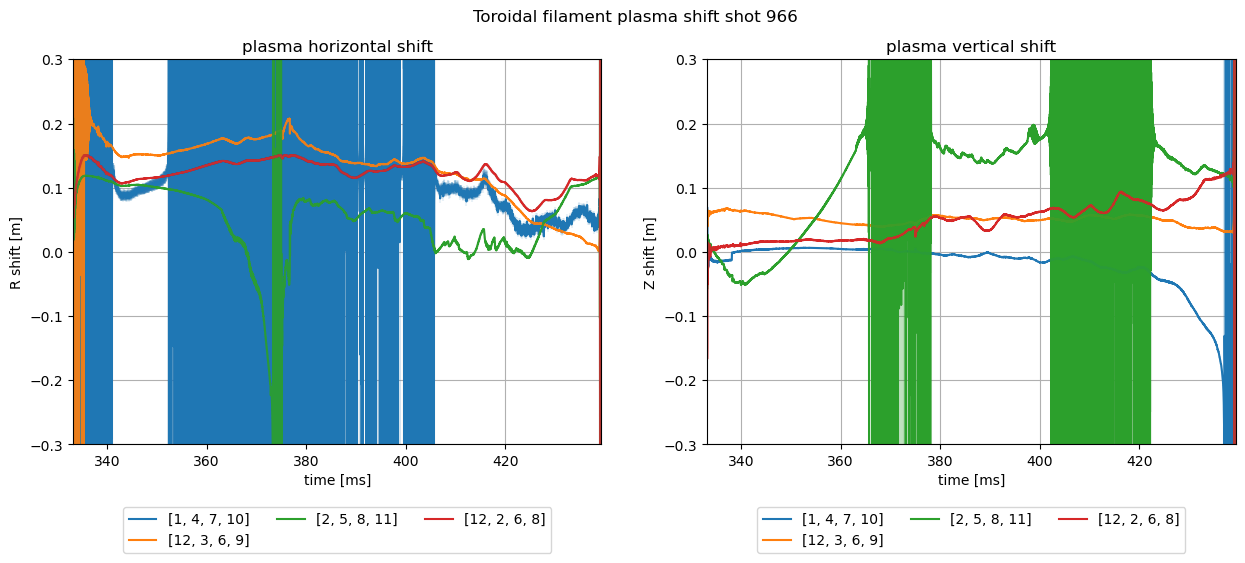

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

fig.suptitle(f"Toroidal filament plasma shift shot {shot_no}")

for t, R_shift,R_err, probe_arr in zip(valid_time,R0_arr,R0_err,use_probes):
    line = ax[0].plot(t,R_shift,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[0].errorbar(t, R_shift, yerr=R_err, alpha=0.1,color = color)

ax[0].set_xlim(discharge_begin,discharge_end)
ax[0].set_ylim(-0.3,0.3)
ax[0].grid()
ax[0].set_xlabel("time [ms]")
ax[0].set_ylabel("R shift [m]")
ax[0].set_title("plasma horizontal shift")
ax[0].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)


for t, Z_shift, Z_err,probe_arr in zip(valid_time, Z0_arr,Z0_err,use_probes):
    line = ax[1].plot(t,Z_shift,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[1].errorbar(t, Z_shift,yerr = Z_err,alpha = 0.1,color = color)
ax[1].set_xlim(discharge_begin,discharge_end)
ax[1].set_ylim(-0.3,0.3)
ax[1].grid()
ax[1].set_xlabel("time [ms]")
ax[1].set_ylabel("Z shift [m]")
ax[1].set_title("plasma vertical shift")
ax[1].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)
plt.show()

# OFIT

In [ ]:
all_frames = get_frames_for_shot(shot_no)
all_frames_images = [rev_image(shot_no,frame) for frame in tqdm(all_frames)]

100%|██████████| 400/400 [00:21<00:00, 18.40it/s]


In [6]:
frame_to_time = lambda frame: frame/2 + 260

time_arr = []
R0_arr, Z0_arr, r_arr = [], [], []
R0_err_arr, Z0_err_arr, r_err_arr = [], [], []
for frame_no, img in tqdm(enumerate(all_frames_images, start=1), total=len(all_frames_images), desc="Processing Frames"):
    #determine time
    OFIT_time = frame_to_time(frame_no)

    #calculate shift with OFIT
    result, cov = OFIT(img,shot_no,frame_no)

    if result == (None,None,None) or cov is None:
        continue

    R0,Z0,r = result

    time_arr.append(OFIT_time)

    R0_arr.append(R0-0.65) #subtract by major radius of tokamak to obtain shift value
    Z0_arr.append(Z0)
    r_arr.append(r)

    R0_err, Z0_err, r_err = cov.diagonal()
    R0_err_arr.append(R0_err)
    Z0_err_arr.append(Z0_err)
    r_err_arr.append(r_err)



OFIT_time = np.array(time_arr)
OFIT_Rshift, OFIT_Rerr = np.array(R0_arr), np.array(R0_err_arr)
OFIT_Zshift, OFIT_Zerr= np.array(Z0_arr), np.array(Z0_err_arr)
OFIT_r, OFIT_rerr = np.array(r_arr), np.array(r_err_arr)

Processing Frames:  96%|█████████▋| 386/400 [03:21<00:00, 15.57it/s]

image shot 966 frame 360 is too dim or too bright returning None
image shot 966 frame 361 is too dim or too bright returning None
image shot 966 frame 362 is too dim or too bright returning None
image shot 966 frame 363 is too dim or too bright returning None
image shot 966 frame 364 is too dim or too bright returning None
image shot 966 frame 365 is too dim or too bright returning None
image shot 966 frame 366 is too dim or too bright returning None
image shot 966 frame 367 is too dim or too bright returning None
image shot 966 frame 368 is too dim or too bright returning None
image shot 966 frame 369 is too dim or too bright returning None
image shot 966 frame 370 is too dim or too bright returning None
image shot 966 frame 371 is too dim or too bright returning None
image shot 966 frame 372 is too dim or too bright returning None
image shot 966 frame 373 is too dim or too bright returning None
image shot 966 frame 374 is too dim or too bright returning None
image shot 966 frame 375 

Processing Frames: 100%|██████████| 400/400 [03:21<00:00,  1.98it/s]

image shot 966 frame 387 is too dim or too bright returning None
image shot 966 frame 388 is too dim or too bright returning None
image shot 966 frame 389 is too dim or too bright returning None
image shot 966 frame 390 is too dim or too bright returning None
image shot 966 frame 391 is too dim or too bright returning None
image shot 966 frame 392 is too dim or too bright returning None
image shot 966 frame 393 is too dim or too bright returning None
image shot 966 frame 394 is too dim or too bright returning None
image shot 966 frame 395 is too dim or too bright returning None
image shot 966 frame 396 is too dim or too bright returning None
image shot 966 frame 397 is too dim or too bright returning None
image shot 966 frame 398 is too dim or too bright returning None
image shot 966 frame 399 is too dim or too bright returning None
image shot 966 frame 400 is too dim or too bright returning None


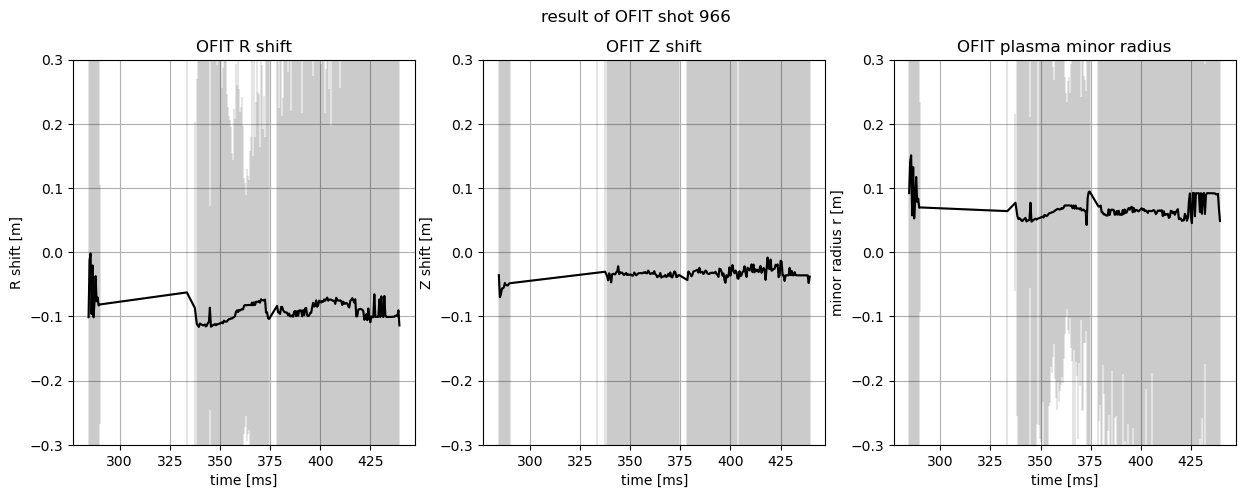

In [10]:
fig, ax = plt.subplots(1,3,figsize = (15,5))

fig.suptitle(f"result of OFIT shot {shot_no}")

#Rshift
ax[0].plot(OFIT_time, OFIT_Rshift,color = "black")
ax[0].errorbar(OFIT_time,OFIT_Rshift,yerr = OFIT_Rerr,alpha = 0.1,color = "black")
ax[0].set_title("OFIT R shift")
ax[0].set_xlabel("time [ms]")
ax[0].set_ylabel("R shift [m]")
ax[0].set_ylim(-0.3,0.3)
ax[0].grid()

#Zshift
ax[1].plot(OFIT_time, OFIT_Zshift,color = "black")
ax[1].errorbar(OFIT_time,OFIT_Zshift,yerr = OFIT_Zerr,alpha = 0.1,color = "black")
ax[1].set_title("OFIT Z shift")
ax[1].set_xlabel("time [ms]")
ax[1].set_ylabel("Z shift [m]")
ax[1].set_ylim(-0.3,0.3)
ax[1].grid()

#plasma minor radius
ax[2].plot(OFIT_time, OFIT_r,color = "black")
ax[2].errorbar(OFIT_time,OFIT_r,yerr = OFIT_rerr,alpha = 0.1, color = "black")
ax[2].set_title("OFIT plasma minor radius")
ax[2].set_xlabel("time [ms]")
ax[2].set_ylabel("minor radius r [m]")
ax[2].set_ylim(-0.3,0.3)
ax[2].grid()

# Combine result

TypeError: 'numpy.float64' object is not iterable

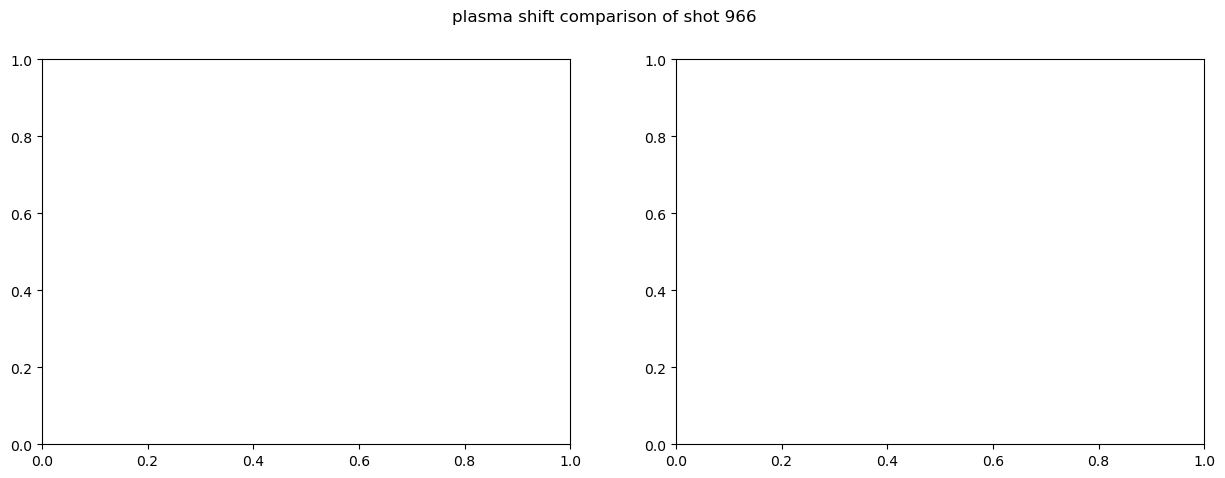

In [9]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

fig.suptitle(f"plasma shift comparison of shot {shot_no}")

#toroidal filament result
for t, R_shift,R_err, probe_arr in zip(valid_time,R0_arr,R0_err,use_probes):
    factor = 0
    if probe_arr == [12,3,6,9]: factor = 0.26
    elif probe_arr == [12,2,6,8]: factor = 0.22
    elif probe_arr == [1,4,7,10]: factor = 0.2
    elif probe_arr == [2,5,8,11]: factor = 0.2
    line = ax[0].plot(t,R_shift- factor,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[0].errorbar(t, R_shift - factor, yerr=R_err, alpha=0.1,color = color)

#OFIT result
ax[0].plot(OFIT_time, OFIT_Rshift,color = "black", label = "OFIT")
ax[0].errorbar(OFIT_time,OFIT_Rshift,yerr = OFIT_Rerr,alpha = 0.1,color = "black")

ax[0].set_xlim(discharge_begin,discharge_end)
ax[0].set_ylim(-0.3,0.3)
ax[0].set_xlim(left = ax[0].get_xlim()[0], right = 370)
ax[0].grid()
ax[0].set_xlabel("time [ms]")
ax[0].set_ylabel("R shift [m]")
ax[0].set_title("plasma horizontal shift")
ax[0].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)


#toroidal filament result
for t, Z_shift, Z_err,probe_arr in zip(valid_time, Z0_arr,Z0_err,use_probes):
    factor = 0
    if probe_arr == [12,3,6,9]: factor = 0.1
    elif probe_arr == [12,2,6,8]: factor = 0.05
    elif probe_arr == [1,4,7,10]: factor = 0.04
    elif probe_arr == [2,5,8,11]: factor = 0.01
    line = ax[1].plot(t,Z_shift-factor,label = f"{probe_arr}")
    color = line[0].get_color()
    ax[1].errorbar(t, Z_shift-factor,yerr = Z_err,alpha = 0.1,color = color)

#OFIT result
ax[1].plot(OFIT_time, OFIT_Zshift,color = "black",label = "OFIT")
ax[1].errorbar(OFIT_time,OFIT_Zshift,yerr = OFIT_Zerr,alpha = 0.1,color = "black")

ax[1].set_xlim(discharge_begin,discharge_end)
ax[1].set_ylim(-0.3,0.3)
ax[1].set_xlim(left=ax[1].get_xlim()[0],right = 370)
ax[1].grid()
ax[1].set_xlabel("time [ms]")
ax[1].set_ylabel("Z shift [m]")
ax[1].set_title("plasma vertical shift")
ax[1].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3),ncol = 3)
plt.show()

# Plot all

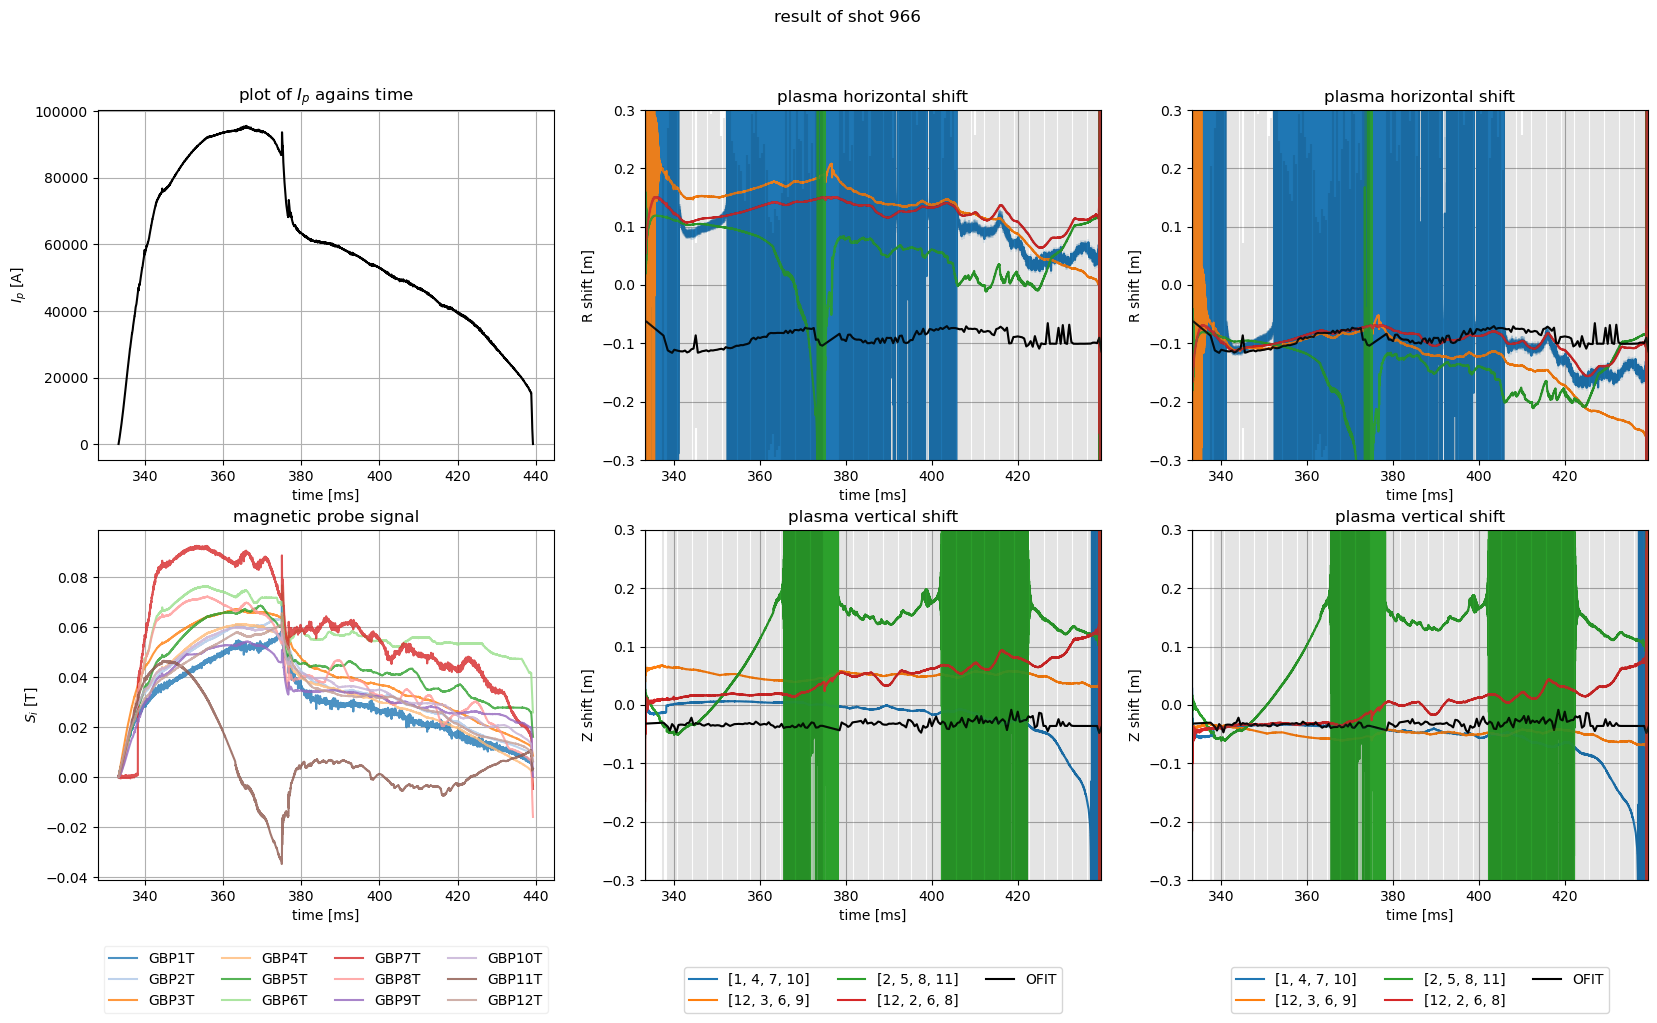

In [66]:
def result_plot(axR,axZ,adjust):
    #toroidal filament result
    for t, R_shift,R_err, probe_arr in zip(valid_time,R0_arr,R0_err,use_probes):
        if probe_arr == [12,3,6,9]: factor = 0.26
        elif probe_arr == [12,2,6,8]: factor = 0.22
        elif probe_arr == [1,4,7,10]: factor = 0.2
        elif probe_arr == [2,5,8,11]: factor = 0.2
        if adjust == False: factor = 0
        line = axR.plot(t,R_shift- factor,label = f"{probe_arr}")
        color = line[0].get_color()
        axR.errorbar(t, R_shift - factor, yerr=R_err, alpha=0.1,color = color)

    #OFIT result
    axR.plot(OFIT_time, OFIT_Rshift,color = "black", label = "OFIT")
    axR.errorbar(OFIT_time,OFIT_Rshift,yerr = OFIT_Rerr,alpha = 0.1,color = "black")

    axR.set_xlim(discharge_begin,discharge_end)
    axR.set_ylim(-0.3,0.3)
    axR.set_xlim(left = axR.get_xlim()[0], right = discharge_end)
    axR.grid()
    axR.set_xlabel("time [ms]")
    axR.set_ylabel("R shift [m]")
    axR.set_title("plasma horizontal shift")

    #toroidal filament result
    for t, Z_shift, Z_err,probe_arr in zip(valid_time, Z0_arr,Z0_err,use_probes):
        if probe_arr == [12,3,6,9]: factor = 0.1
        elif probe_arr == [12,2,6,8]: factor = 0.05
        elif probe_arr == [1,4,7,10]: factor = 0.04
        elif probe_arr == [2,5,8,11]: factor = 0.01
        if adjust == False: factor = 0
        line = axZ.plot(t,Z_shift-factor,label = f"{probe_arr}")
        color = line[0].get_color()
        axZ.errorbar(t, Z_shift-factor,yerr = Z_err,alpha = 0.1,color = color)

    #OFIT result
    axZ.plot(OFIT_time, OFIT_Zshift,color = "black",label = "OFIT")
    axZ.errorbar(OFIT_time,OFIT_Zshift,yerr = OFIT_Zerr,alpha = 0.1,color = "black")

    axZ.set_xlim(discharge_begin,discharge_end)
    axZ.set_ylim(-0.3,0.3)
    axZ.set_xlim(left=axZ.get_xlim()[0],right = discharge_end)
    axZ.grid()
    axZ.set_xlabel("time [ms]")
    axZ.set_ylabel("Z shift [m]")
    axZ.set_title("plasma vertical shift")
    axZ.legend(loc = "lower center",bbox_to_anchor = (0.5,-0.4),ncol = 3)

fig, ax = plt.subplots(2,3,figsize = (20,10))

fig.suptitle(f"result of shot {shot_no}")

#plasma current
column_names = plasma_signal.columns[1:]
ax[0,0].plot(time, plasma_current,color = "black")
ax[0,0].set_xlabel("time [ms]")
ax[0,0].set_ylabel("$I_p$ [A]")
ax[0,0].grid()
ax[0,0].set_title("plot of $I_p$ agains time")

cmap = plt.get_cmap("tab20")  # A colormap with 10 distinct colors

#probe signal
for i, name in enumerate(column_names):
    ax[1,0].plot(time, plasma_signal[name], label=name, color=cmap(i),alpha = 0.8)
ax[1,0].set_xlabel("time [ms]")
ax[1,0].set_ylabel("$S_i$ [T]")
ax[1,0].grid()
ax[1,0].set_title("magnetic probe signal")
ax[1,0].legend(loc = "lower center", bbox_to_anchor = (0.5,-0.4),ncol = 4,framealpha = 0.3)

#unadjusted result
result_plot(ax[0,1],ax[1,1],False)
#adjusted result
result_plot(ax[0,2],ax[1,2],True)